# Iris example data set

In [3]:
# Load the necessary libraries 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.svm import SVC 
from sklearn import datasets
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, KFold

In [4]:
# Load the iris dataset 
iris_data = datasets.load_iris()

# Data Explored and prepration

In [5]:
iris_df = pd.DataFrame(data= iris_data['data'], columns= iris_data['feature_names'])
iris_df['target'] = iris_data.target

In [6]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [7]:
# checking for missing values
print(iris_df.isnull().sum())

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64


<Axes: >

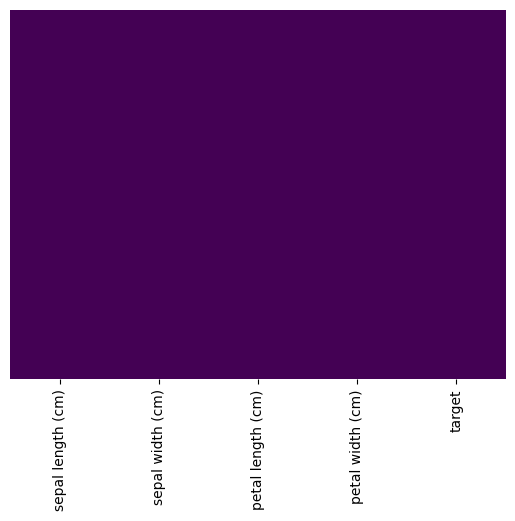

In [8]:
# heatmap for checking the data is null or not
sns.heatmap(iris_df.isnull(), yticklabels = False, cbar = False, cmap ='viridis')

# Adding iris type from the iris_df['target']

In [9]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [10]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(iris_df.drop('target', axis=1))
scaled_df = pd.DataFrame(scaled_features, columns=iris_data['feature_names'])
scaled_df['target'] = iris_df['target']

In [11]:
# Split the data into training and testing sets 
X_train, X_test, y_train, y_test = train_test_split(scaled_df.drop('target', axis=1), scaled_df['target'], test_size=0.2, random_state=42) 

# SVM implementation

In [12]:
# Create an SVM model and train it 
model = SVC(kernel='linear') 
model.fit(X_train, y_train) 

SVC(kernel='linear')

In [13]:
# predict the model
y_pred = model.predict(X_test)

# K-fold Cross-Validation

In [14]:
# Define k-fold cross-validation
k_fold = KFold(n_splits=5, shuffle=True, random_state=42)


# applying cross validation
cv_scores = cross_val_score(model, scaled_df.drop('target', axis=1), scaled_df['target'], cv=k_fold)


# average accuracy
print("Average Accuracy:", cv_scores.mean())


Average Accuracy: 0.9733333333333334


# Evaluation Metrics

In [15]:
# Calculate evaluation metrics
print(confusion_matrix(y_test, y_pred))
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

print(classification_report(y_test, y_pred))

[[10  0  0]
 [ 0  8  1]
 [ 0  0 11]]
Accuracy: 0.9666666666666667
Precision: 0.9722222222222222
Recall: 0.9629629629629629
F1-score: 0.9658994032395567
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.89      0.94         9
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



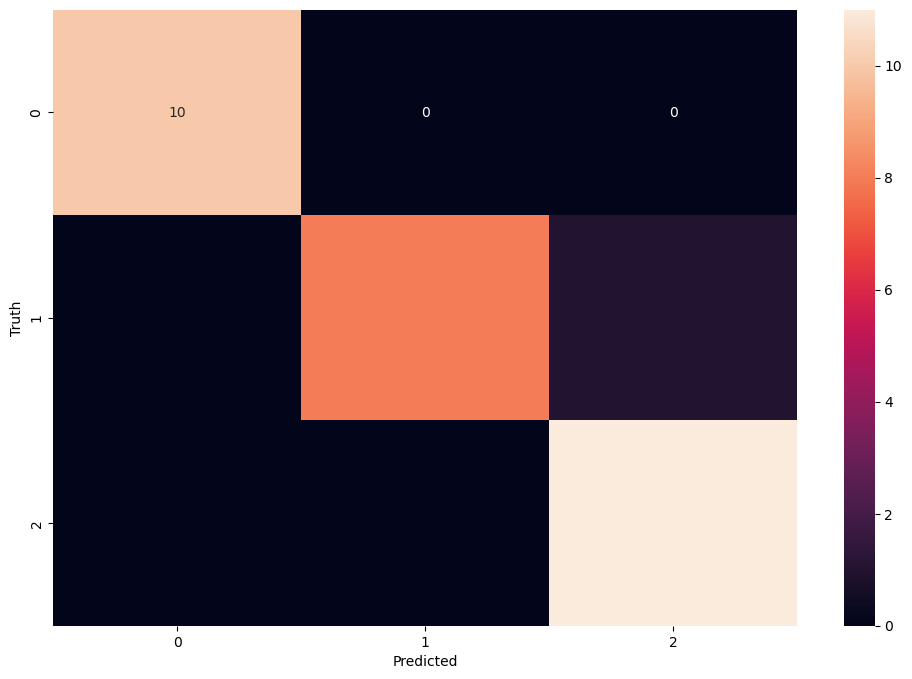

In [16]:
# draw the confusion matrix using heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)

# label the plot
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()
